In [30]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Saher\\Downloads\\INFY.csv')

In [31]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-11,0.583984,0.781250,0.583984,0.732422,0.490145,172512000
1,1999-03-12,0.734375,0.761719,0.671875,0.728516,0.487531,39897600
2,1999-03-15,0.730469,0.730469,0.658203,0.662109,0.443090,12672000
3,1999-03-16,0.667969,0.691406,0.656250,0.656250,0.439170,9984000
4,1999-03-17,0.656250,0.699219,0.652344,0.660156,0.441783,15449600
...,...,...,...,...,...,...,...
6122,2023-07-11,16.260000,16.280001,16.150000,16.240000,16.240000,7631500
6123,2023-07-12,16.260000,16.290001,16.030001,16.070000,16.070000,7102600
6124,2023-07-13,16.580000,16.850000,16.580000,16.790001,16.790001,13295300
6125,2023-07-14,17.160000,17.200001,16.990000,17.040001,17.040001,11539700


In [32]:
df = df[['Date','Close']]
df

,Date,Close
0,1999-03-11,0.732422
1,1999-03-12,0.728516
2,1999-03-15,0.662109
3,1999-03-16,0.656250
4,1999-03-17,0.660156
...,...,...
6122,2023-07-11,16.240000
6123,2023-07-12,16.070000
6124,2023-07-13,16.790001
6125,2023-07-14,17.040001


In [33]:
df['Date']

0       1999-03-11
1       1999-03-12
2       1999-03-15
3       1999-03-16
4       1999-03-17
           ...    
6122    2023-07-11
6123    2023-07-12
6124    2023-07-13
6125    2023-07-14
6126    2023-07-17
Name: Date, Length: 6127, dtype: object

In [34]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1999-03-11')
datetime_object

datetime.datetime(1999, 3, 11, 0, 0)

In [35]:
import warnings
warnings.filterwarnings('ignore')
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1999-03-11
1      1999-03-12
2      1999-03-15
3      1999-03-16
4      1999-03-17
          ...    
6122   2023-07-11
6123   2023-07-12
6124   2023-07-13
6125   2023-07-14
6126   2023-07-17
Name: Date, Length: 6127, dtype: datetime64[ns]

In [36]:
#making date column the index

df.index = df.pop('Date')
df

,Close
Date,
1999-03-11,0.732422
1999-03-12,0.728516
1999-03-15,0.662109
1999-03-16,0.656250
1999-03-17,0.660156
...,...
2023-07-11,16.240000
2023-07-12,16.070000
2023-07-13,16.790001


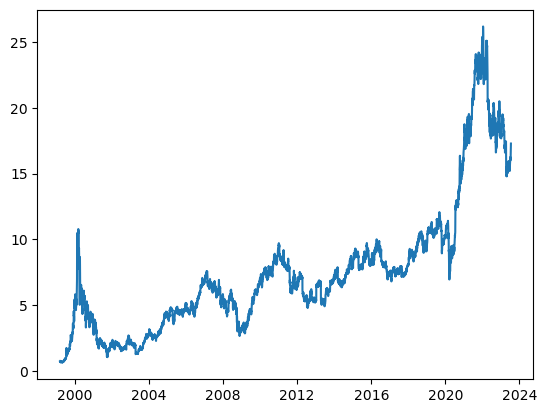

In [37]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [38]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2022-07-19'
windowed_df = df_to_windowed_df(df, 
                                '2022-07-19', 
                                '2023-07-17', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-07-19,17.900000,18.170000,18.440001,18.709999
1,2022-07-20,18.170000,18.440001,18.709999,18.719999
2,2022-07-21,18.440001,18.709999,18.719999,19.209999
3,2022-07-22,18.709999,18.719999,19.209999,18.879999
4,2022-07-25,18.719999,19.209999,18.879999,18.559999
...,...,...,...,...,...
245,2023-07-11,16.070000,16.049999,16.010000,16.240000
246,2023-07-12,16.049999,16.010000,16.240000,16.070000
247,2023-07-13,16.010000,16.240000,16.070000,16.790001
248,2023-07-14,16.240000,16.070000,16.790001,17.040001


In [39]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

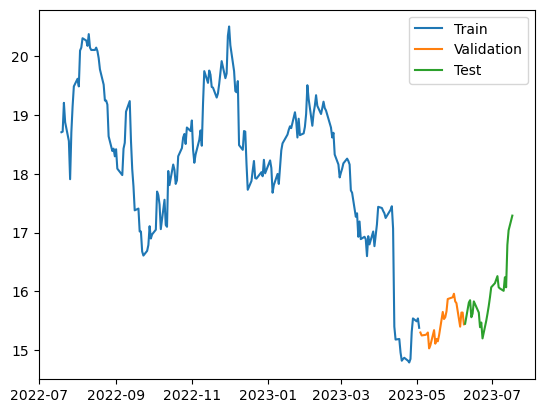

In [40]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 107ms/step - loss: 342.8207 - mean_absolute_error: 18.4695 - val_loss: 238.2506 - val_mean_absolute_error: 15.4329
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 330.6129 - mean_absolute_error: 18.1375 - val_loss: 234.5894 - val_mean_absolute_error: 15.3139
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 324.9484 - mean_absolute_error: 17.9810 - val_loss: 228.4444 - val_mean_absolute_error: 15.1119
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 316.5637 - mean_absolute_error: 17.7464 - val_loss: 219.9815 - val_mean_absolute_error: 14.8293
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 305.5193 - mean_absolute_error: 17.4329 - val_loss: 208.6366 - val_mean_absolute_error: 14.4417
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 289.3486 - mean_absolute_error: 16.9627 - val_loss: 190.3260 - val_mean_absolute_error: 13.

7/7 [==============================] - 0s 8ms/step - loss: 1.4412 - mean_absolute_error: 0.9380 - val_loss: 6.3919 - val_mean_absolute_error: 2.5154
Epoch 52/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3962 - mean_absolute_error: 0.9153 - val_loss: 6.1124 - val_mean_absolute_error: 2.4592
Epoch 53/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3826 - mean_absolute_error: 0.9110 - val_loss: 6.1508 - val_mean_absolute_error: 2.4670
Epoch 54/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3738 - mean_absolute_error: 0.9121 - val_loss: 6.1406 - val_mean_absolute_error: 2.4650
Epoch 55/100
7/7 [==============================] - 0s 9ms/step - loss: 1.3707 - mean_absolute_error: 0.8912 - val_loss: 6.4395 - val_mean_absolute_error: 2.5250
Epoch 56/100
7/7 [==============================] - 0s 9ms/step - loss: 1.3323 - mean_absolute_error: 0.8927 - val_loss: 5.5649 - val_mean_absolute_error: 2.3453
Epoch 57/100
7/7 [=======================

7/7 [==============================] - 0s 3ms/step


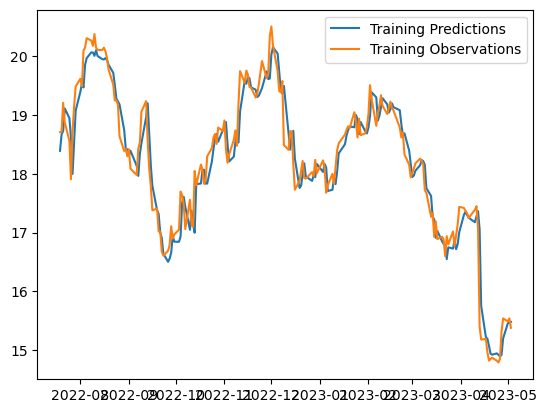

In [42]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 24ms/step


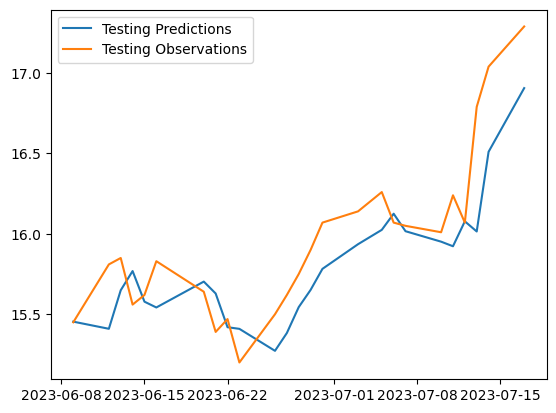

In [43]:

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

NameError: name 'val_predictions' is not defined

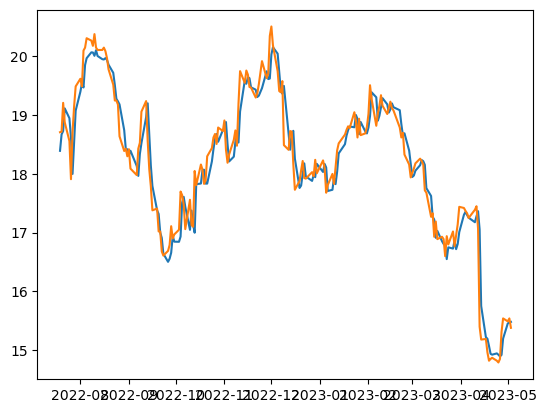

In [44]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])